In [1]:
#Assignment 3

from __future__ import print_function
import csv
import requests
import sys
import os

import numpy as np
from numpy.random import randn
import pylab as pl

from pandas import Series, DataFrame
import pandas
import pandas as pd
import matplotlib

#Check that an environmental variable DFDATA exists and that it points to 
#the data facility location /gws/open/NYCOpenData/nycopendata/data/
print (os.environ.get('DFDATA'))

/gws/open/NYCOpenData/nycopendata/data


In [2]:
# setting up some preferences
%pylab inline

#np.set_printoptions(precision=4, threshold=500)
#np.random.seed(123321)
#pl.rc('figure', figsize=(10, 6))
#pd.options.display.max_rows = 10

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Pull top 5 rows
df_dmv = pd.read_csv("https://data.cityofnewyork.us/resource/h9gi-nx95.csv")
df_dmv.head(n=5)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/13/2016,0:00,BROOKLYN,11203.0,NaN,NaN,NaN,AVENUE D,EAST 51 STREET,NaN,...,Passing or Lane Usage Improper,NaN,NaN,NaN,3519620,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1,09/13/2016,0:00,BROOKLYN,11210.0,NaN,NaN,NaN,EAST 31 STREET,GLENWOOD ROAD,NaN,...,Unspecified,NaN,NaN,NaN,3519276,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
2,09/13/2016,0:00,BROOKLYN,11219.0,NaN,NaN,NaN,61 STREET,13 AVENUE,NaN,...,NaN,NaN,NaN,NaN,3519513,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
3,09/13/2016,0:00,MANHATTAN,10001.0,NaN,NaN,NaN,10 AVENUE,WEST 31 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3519012,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
4,09/13/2016,0:00,MANHATTAN,10011.0,NaN,NaN,NaN,AVENUE OF THE AMERICAS,WEST 4 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3519270,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN


In [4]:
#Truncate number of columns
col_list=['UNIQUE KEY', 'CONTRIBUTING FACTOR VEHICLE 1','LATITUDE','LONGITUDE'] 
df_accidentloc = df_dmv[col_list]
df_accidentloc.head(n=5)

,UNIQUE KEY,CONTRIBUTING FACTOR VEHICLE 1,LATITUDE,LONGITUDE
0,3519620,Failure to Yield Right-of-Way,NaN,NaN
1,3519276,Unspecified,NaN,NaN
2,3519513,Unspecified,NaN,NaN
3,3519012,Following Too Closely,NaN,NaN
4,3519270,Unsafe Speed,NaN,NaN


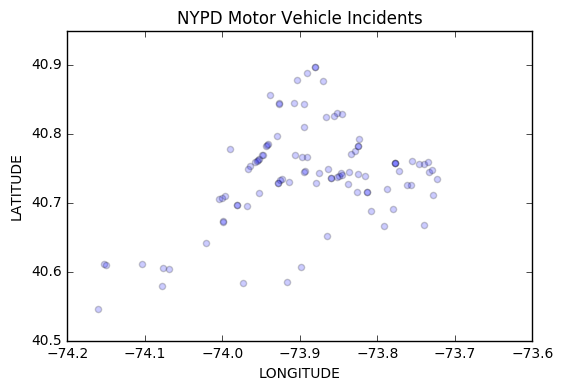

In [5]:
#Plot data
ax = df_accidentloc.plot.scatter(x='LONGITUDE', y='LATITUDE', alpha=0.2)
ax.set_title("NYPD Motor Vehicle Incidents")